# Importing and cleaning the data

In [2]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
np.bool = np.bool_
import string

#Import data files

countries_path = "data/Countries_values_data.csv"

#Read the data
countries_df = pd.read_csv(countries_path)

#Display the data table for preview
countries_df

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,ipfrule,ipgdtim,iphlppl,iplylfr,ipmodst,iprspot,ipshabt,ipstrgv,ipsuces,ipudrst
0,ESS1e06_7,1,6.7,23.11.2023,1,CH,0.514000,0.514995,0.296298,0.152592,...,4.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0
1,ESS1e06_7,1,6.7,23.11.2023,2,CH,0.514000,0.413239,0.296298,0.122442,...,2.0,1.0,4.0,1.0,2.0,2.0,4.0,1.0,2.0,3.0
2,ESS1e06_7,1,6.7,23.11.2023,7,CH,0.514000,0.480271,0.296298,0.142303,...,6.0,1.0,3.0,2.0,3.0,6.0,4.0,5.0,2.0,4.0
3,ESS1e06_7,1,6.7,23.11.2023,10,CH,1.028000,1.046428,0.296298,0.310054,...,3.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,2.0
4,ESS1e06_7,1,6.7,23.11.2023,14,CH,2.055900,1.920992,0.296298,0.569185,...,4.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,02.11.2023,27903,HU,1.226848,1.302095,0.449624,0.585453,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,02.11.2023,27905,HU,0.778477,1.274237,0.449624,0.572927,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,02.11.2023,27914,HU,1.259867,1.396051,0.449624,0.627697,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,02.11.2023,27921,HU,0.778477,0.751644,0.449624,0.337957,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [3]:
countries_df_cleaned = countries_df.drop(['proddate','dweight', 'pspwght', 'pweight', 'anweight', 'prob',
                                               'stratum', 'psu'], axis=1)
countries_df_cleaned

,name,essround,edition,idno,cntry,stfgov,trstlgl,trstplt,trstprt,impdiff,...,ipfrule,ipgdtim,iphlppl,iplylfr,ipmodst,iprspot,ipshabt,ipstrgv,ipsuces,ipudrst
0,ESS1e06_7,1,6.7,1,CH,4,4,5,NaN,1.0,...,4.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0
1,ESS1e06_7,1,6.7,2,CH,4,8,6,NaN,1.0,...,2.0,1.0,4.0,1.0,2.0,2.0,4.0,1.0,2.0,3.0
2,ESS1e06_7,1,6.7,7,CH,9,4,6,NaN,3.0,...,6.0,1.0,3.0,2.0,3.0,6.0,4.0,5.0,2.0,4.0
3,ESS1e06_7,1,6.7,10,CH,6,7,6,NaN,3.0,...,3.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,2.0
4,ESS1e06_7,1,6.7,14,CH,3,4,3,NaN,1.0,...,4.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,27903,HU,7,7,1,0.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,27905,HU,0,2,0,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,27914,HU,3,6,5,5.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,27921,HU,1,1,3,4.0,2.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [4]:
#Renaming my columns
countries_df = countries_df_cleaned.rename(columns=
                                   {"stfgov": "Gov_Satisfaction",
                                    "trstlgl": "Trust_Legal_System",
                                    "trstplt": "Trust_Politicians",
                                    "trstprt": "Trust_Political_Parties", 
                                    "impdiff": "Imp_New",
                                    "impenv": "Imp_Env",
                                    "impfree": "Imp_Free",
                                    "impfun": "Imp_Fun",
                                    "imprich": "Imp_Rich",
                                    "impsafe": "Imp_Safe",
                                    "imptrad": "Imp_Tradition",
                                    "ipadvnt": "Imp_Adventure",
                                    "ipbhprp": "Imp_Behave",
                                    "ipcrtiv": "Imp_Creative",
                                    "ipeqopt": "Imp_Equality",
                                    "ipfrule": "Imp_Fol_Rules",
                                    "ipgdtim": "Imp_Good_Time",
                                    "iphlppl": "Imp_Help_People",
                                    "iplylfr": "Imp_Loyal_Friends",
                                    "ipmodst": "Imp_Humble",
                                    "iprspot": "Imp_Respect",
                                    "ipshabt": "Imp_Admired",
                                    "ipstrgv": "Imp_Strong_Safe_Gov",
                                    "ipsuces": "Imp_Successful",
                                    "ipudrst": "Imp_Understanding"
                                   })
countries_df

,name,essround,edition,idno,cntry,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
0,ESS1e06_7,1,6.7,1,CH,4,4,5,NaN,1.0,...,4.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0
1,ESS1e06_7,1,6.7,2,CH,4,8,6,NaN,1.0,...,2.0,1.0,4.0,1.0,2.0,2.0,4.0,1.0,2.0,3.0
2,ESS1e06_7,1,6.7,7,CH,9,4,6,NaN,3.0,...,6.0,1.0,3.0,2.0,3.0,6.0,4.0,5.0,2.0,4.0
3,ESS1e06_7,1,6.7,10,CH,6,7,6,NaN,3.0,...,3.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,2.0
4,ESS1e06_7,1,6.7,14,CH,3,4,3,NaN,1.0,...,4.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,27903,HU,7,7,1,0.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,27905,HU,0,2,0,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,27914,HU,3,6,5,5.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,27921,HU,1,1,3,4.0,2.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [5]:
#Dropping rows with NaN values, 88, or 77

data_df1 = countries_df.dropna()
data_df2 = data_df1.drop(data_df1[data_df1['Gov_Satisfaction'] == 88].index)
data_df3 = data_df2.drop(data_df2[data_df2['Gov_Satisfaction'] == 77].index)
data_df4 = data_df3.drop(data_df3[data_df3['Trust_Legal_System'] == 88].index)
data_df5 = data_df4.drop(data_df4[data_df4['Trust_Legal_System'] == 77].index)
data_df6 = data_df5.drop(data_df5[data_df5['Trust_Politicians'] == 88].index)
data_df7 = data_df6.drop(data_df6[data_df6['Trust_Politicians'] == 77].index)
data_df8 = data_df7.drop(data_df7[data_df7['Trust_Political_Parties'] == 88].index)
data_df9 = data_df8.drop(data_df8[data_df8['Trust_Political_Parties'] == 77].index)
data_df9

,name,essround,edition,idno,cntry,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
7777,ESS2e03_6,2,3.6,2,CH,7,10,8,8.0,2.0,...,5.0,1.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,2.0
7778,ESS2e03_6,2,3.6,15,CH,3,8,2,3.0,2.0,...,4.0,2.0,3.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
7779,ESS2e03_6,2,3.6,16,CH,3,5,5,5.0,5.0,...,3.0,2.0,1.0,2.0,1.0,6.0,6.0,5.0,6.0,1.0
7780,ESS2e03_6,2,3.6,18,CH,7,8,7,6.0,4.0,...,2.0,3.0,2.0,2.0,2.0,5.0,5.0,3.0,6.0,2.0
7781,ESS2e03_6,2,3.6,20,CH,6,6,6,6.0,5.0,...,3.0,2.0,3.0,2.0,2.0,3.0,5.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,27903,HU,7,7,1,0.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,27905,HU,0,2,0,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,27914,HU,3,6,5,5.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,27921,HU,1,1,3,4.0,2.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


# Here is my code to perform correlation analysis on 25 variables of interest

In [13]:
#Dropping non-numerical data columns
data_df9_clean = data_df9.drop(['name', 'essround','edition'], axis=1)
data_df9_clean

,idno,cntry,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,Imp_Env,Imp_Free,Imp_Fun,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
7777,2,CH,7,10,8,8.0,2.0,2.0,2.0,2.0,...,5.0,1.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,2.0
7778,15,CH,3,8,2,3.0,2.0,1.0,1.0,4.0,...,4.0,2.0,3.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
7779,16,CH,3,5,5,5.0,5.0,1.0,2.0,6.0,...,3.0,2.0,1.0,2.0,1.0,6.0,6.0,5.0,6.0,1.0
7780,18,CH,7,8,7,6.0,4.0,2.0,2.0,2.0,...,2.0,3.0,2.0,2.0,2.0,5.0,5.0,3.0,6.0,2.0
7781,20,CH,6,6,6,6.0,5.0,1.0,1.0,3.0,...,3.0,2.0,3.0,2.0,2.0,3.0,5.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,27903,HU,7,7,1,0.0,3.0,1.0,2.0,1.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,27905,HU,0,2,0,3.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,27914,HU,3,6,5,5.0,3.0,1.0,4.0,4.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,27921,HU,1,1,3,4.0,2.0,3.0,4.0,3.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


# Switzerland Correlations

In [14]:
#Only Swizerland (CH)
data_CH = data_df9_clean.loc[data_df9_clean['cntry'] == 'CH']

#Drop string
data_CH_clean = data_CH.drop(['cntry'], axis=1)

#Perform correlation
data_CH_corr = data_CH_clean.corr(method='pearson')
dataCorr = data_CH_corr.mask(np.tril(np.ones(data_CH_corr.shape)).astype(np.bool))
dataCorr_New = dataCorr[abs(dataCorr) >= 0.5].stack().reset_index()
dataCorr_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']
dataCorr_New.sort_values(by='R2 > 0.5', ascending=False).head()

,Variable 1,Variable 2,R2 > 0.5
2,Trust_Politicians,Trust_Political_Parties,0.768365
3,Imp_Fun,Imp_Good_Time,0.535659
0,Gov_Satisfaction,Trust_Politicians,0.534697
1,Trust_Legal_System,Trust_Politicians,0.518192


In [9]:
data_CH_clean

,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,Imp_Env,Imp_Free,Imp_Fun,Imp_Rich,Imp_Safe,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
7777,7,10,8,8.0,2.0,2.0,2.0,2.0,4.0,4.0,...,5.0,1.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,2.0
7778,3,8,2,3.0,2.0,1.0,1.0,4.0,3.0,4.0,...,4.0,2.0,3.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
7779,3,5,5,5.0,5.0,1.0,2.0,6.0,5.0,4.0,...,3.0,2.0,1.0,2.0,1.0,6.0,6.0,5.0,6.0,1.0
7780,7,8,7,6.0,4.0,2.0,2.0,2.0,4.0,3.0,...,2.0,3.0,2.0,2.0,2.0,5.0,5.0,3.0,6.0,2.0
7781,6,6,6,6.0,5.0,1.0,1.0,3.0,4.0,2.0,...,3.0,2.0,3.0,2.0,2.0,3.0,5.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69497,6,7,7,8.0,4.0,3.0,2.0,6.0,3.0,1.0,...,3.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
69498,0,0,6,3.0,1.0,1.0,1.0,2.0,6.0,6.0,...,6.0,1.0,1.0,2.0,2.0,4.0,6.0,1.0,2.0,2.0
69499,7,8,6,6.0,3.0,1.0,5.0,1.0,6.0,1.0,...,3.0,1.0,1.0,1.0,2.0,5.0,5.0,3.0,4.0,2.0
69500,8,9,8,7.0,4.0,2.0,2.0,3.0,5.0,3.0,...,4.0,4.0,2.0,2.0,3.0,4.0,6.0,2.0,5.0,2.0


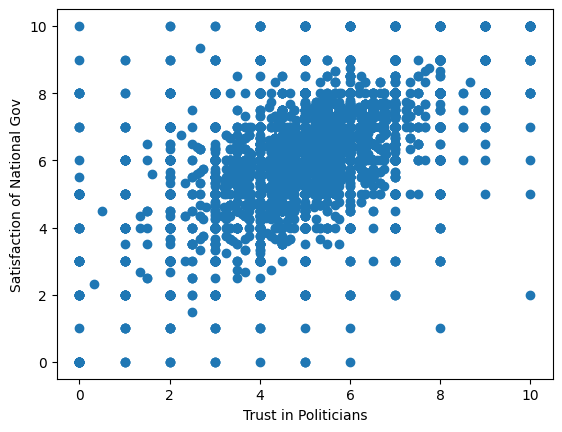

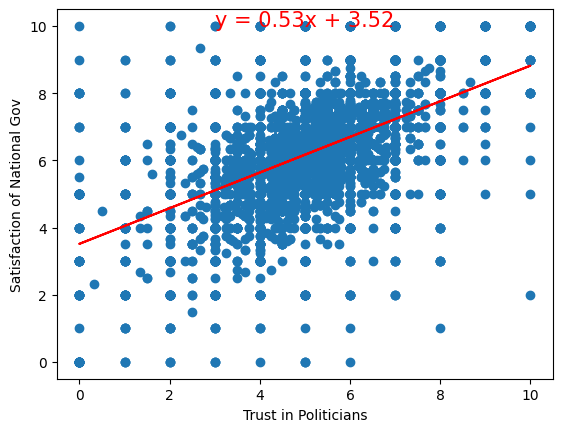

In [21]:
# Generate a scatter plot:
# Government Satisfaction vs. Trust in Politicians
Trust_Politicians_data = data_CH.groupby('idno')['Trust_Politicians'].mean()
Gov_Satisfaction_data = data_CH.groupby('idno')['Gov_Satisfaction'].mean()
plt.scatter(Trust_Politicians_data, Gov_Satisfaction_data)
plt.xlabel('Trust in Politicians')
plt.ylabel('Satisfaction of National Gov')
plt.show()

#Regression graph
#corr = weight.corr(avgSize)
#print(f" The correlation between mouse weight and the average tumor volume is: {corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Trust_Politicians_data, Gov_Satisfaction_data)
fit = Trust_Politicians_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Trust_Politicians_data, Gov_Satisfaction_data)
plt.plot(Trust_Politicians_data, fit, "r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Trust in Politicians')
plt.ylabel('Satisfaction of National Gov')
plt.show()

In [7]:
#Output to csv
data_CH_corr.to_csv("output_data/CH_corr.csv")

## Hungary Correlations

In [8]:
#Only Hungary (HU)
data_HU = data_df9_clean.loc[data_df9_clean['cntry'] == 'HU']

#Drop string "country"
data_HU_clean = data_HU.drop(['cntry'], axis=1)

#Perform correlation
data_HU_corr = data_HU_clean.corr(method='pearson')

#Dropping duplicate values
dataCorr_HU = data_HU_corr.mask(np.tril(np.ones(data_HU_corr.shape)).astype(np.bool))
dataCorr_HU_New = dataCorr_HU[abs(dataCorr_HU) >= 0.5].stack().reset_index()

#Renaming Columns
dataCorr_HU_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']

#Sort Descending by R2 value
dataCorr_HU_New.sort_values(by='R2 > 0.5', ascending=False)

,Variable 1,Variable 2,R2 > 0.5
28,Imp_Env,Imp_Loyal_Friends,0.812215
21,Imp_Env,Imp_Safe,0.769612
79,Imp_Safe,Imp_Loyal_Friends,0.764125
32,Imp_Env,Imp_Strong_Safe_Gov,0.748222
83,Imp_Safe,Imp_Strong_Safe_Gov,0.746245
...,...,...,...
124,Imp_Equality,Imp_Respect,0.517919
36,Imp_Free,Imp_Rich,0.516180
9,Imp_New,Imp_Behave,0.513600
152,Imp_Humble,Imp_Respect,0.504865


In [9]:
#Output to csv
data_HU_corr.to_csv("output_data/HU_corr.csv")

## Finland Correlations

In [22]:
#Only Finland (FI)
data_FI = data_df9_clean.loc[data_df9_clean['cntry'] == 'FI']

#Drop string
data_FI_clean = data_FI.drop(['cntry'], axis=1)

#Perform correlation
data_FI_corr = data_FI_clean.corr(method='pearson')

#Dropping duplicate values
dataCorr_FI = data_FI_corr.mask(np.tril(np.ones(data_FI_corr.shape)).astype(np.bool))
dataCorr_FI_New = dataCorr_FI[abs(dataCorr_FI) >= 0.5].stack().reset_index()

#Renaming Columns
dataCorr_FI_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']

#Sort Descending by R2 value
dataCorr_FI_New.sort_values(by='R2 > 0.5', ascending=False).head()

,Variable 1,Variable 2,R2 > 0.5
3,Trust_Politicians,Trust_Political_Parties,0.846762
133,Imp_Help_People,Imp_Loyal_Friends,0.807550
28,Imp_Env,Imp_Loyal_Friends,0.790455
139,Imp_Help_People,Imp_Understanding,0.783568
145,Imp_Loyal_Friends,Imp_Understanding,0.770735


In [11]:
#Output to csv
data_FI_corr.to_csv("output_data/FI_corr.csv")

## Great Britain Correlations

In [12]:
#Only Great Britain (GB)
data_GB = data_df9_clean.loc[data_df9_clean['cntry'] == 'GB']

#Drop string
data_GB_clean = data_GB.drop(['cntry'], axis=1)

#Perform correlation
data_GB_corr = data_GB_clean.corr(method='pearson')

#Dropping duplicate values
dataCorr_GB = data_GB_corr.mask(np.tril(np.ones(data_GB_corr.shape)).astype(np.bool))
dataCorr_GB_New = dataCorr_GB[abs(dataCorr_GB) >= 0.5].stack().reset_index()

#Renaming Columns
dataCorr_GB_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']

#Sort Descending by R2 value
dataCorr_GB_New.sort_values(by='R2 > 0.5', ascending=False)

,Variable 1,Variable 2,R2 > 0.5
4,Trust_Politicians,Trust_Political_Parties,0.847861
8,Imp_Admired,Imp_Successful,0.587688
7,Imp_Help_People,Imp_Loyal_Friends,0.565242
0,Gov_Satisfaction,Trust_Politicians,0.556883
6,Imp_Fun,Imp_Good_Time,0.551356
2,Trust_Legal_System,Trust_Politicians,0.532747
1,Gov_Satisfaction,Trust_Political_Parties,0.529889
5,Imp_New,Imp_Adventure,0.513975
3,Trust_Legal_System,Trust_Political_Parties,0.504616


In [13]:
#Output to csv
data_GB_corr.to_csv("output_data/GB_corr.csv")